In [1]:
import sys
sys.path.append("/mnt/c/Users/dambr/Desktop/AstroCosmoComputational/Students/Anna_DAmbrosio/")

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",})

# Import pyACC logger
#from pyACC.helpers import Logger

# Set the logger
#print = Logger("pyACC.CosmologicalDistances")

# Import your integration methods
from pyACC.Calculus import *

# Import integration class
from pyACC.cosmology import *

import scipy as sp
from scipy import interpolate
from scipy.misc import derivative

In [2]:
# Fixed value of the variables
z_fixed = 100.0
H0_point = 70.0
Om_point = 0.3
wde_point = -1.0

# Array in which the derivative is calculated
N = 100 #number of points in the array cointing the value at which the derivatives will be calculated
H0_min = 67.0
H0_max = 70.0
Om_min = 0.1
Om_max = 0.32
wde_min = -1.5
wde_max = -0.5
H0_fixed = np.linspace(H0_min, H0_max, N)
Om_fixed = np.linspace(Om_min, Om_max, N)
wde_fixed = np.linspace(wde_min, wde_max, N)

# Spacing of derivative
d_x = 1e-6

In [3]:
# Definition of distance modulus (in flat spacetime) as a function of all the parameters and z
mu = lambda H0, Om, wde: 5*np.log10(luminosity_distance(z=z_fixed, H_0=H0, O_m=Om, O_de=1-Om, w_de=wde))

In [4]:
# Function to differentiate (mu where all the parameters are fixed exept the one for which the differentiation is being done)
mu_H0 = Function(lambda H0: mu(H0,Om_point,wde_point))
mu_Om = Function(lambda Om: mu(H0_point,Om,wde_point))
mu_wde = Function(lambda wde: mu(H0_point,Om_point,wde))

In [5]:
# Derivative of the functions
dmu_dH0 = mu_H0.Derivative(H0_fixed,dx=d_x)
dmu_dOm = mu_Om.Derivative(Om_fixed,dx=d_x)
dmu_dwde = mu_wde.Derivative(wde_fixed,dx=d_x)

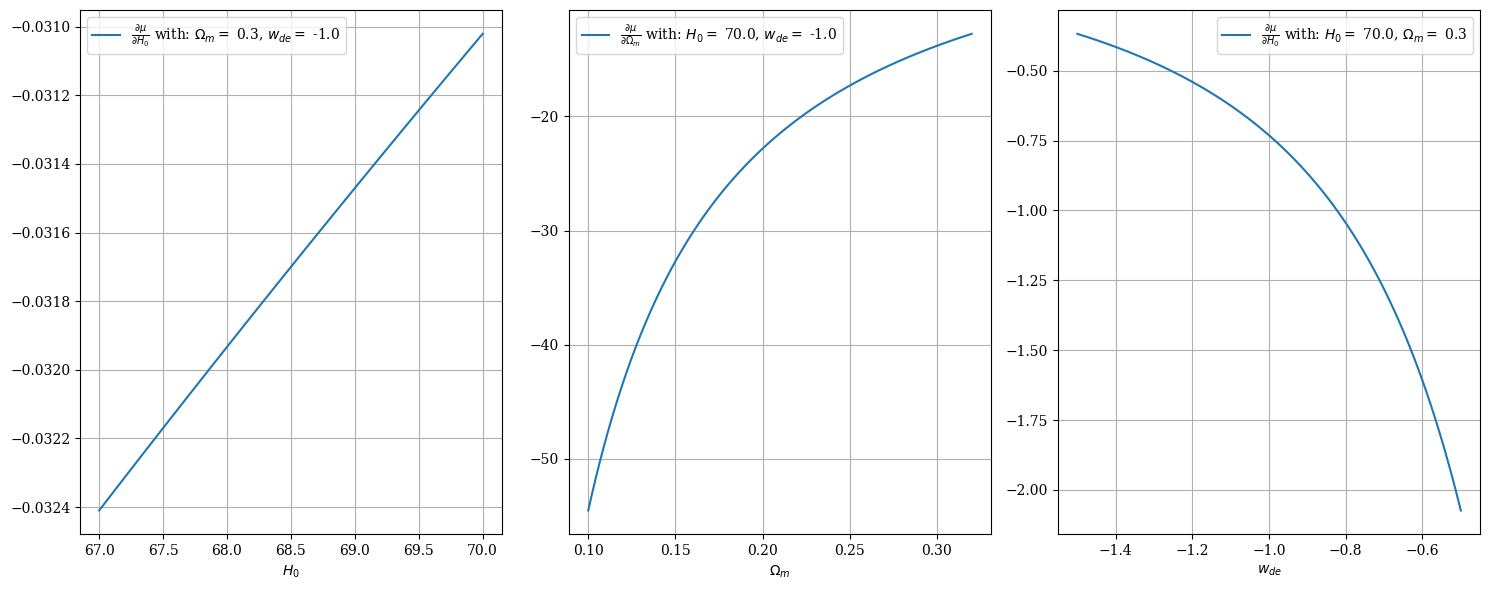

In [6]:
# Plots
fig, ax = plt.subplots(1, 3, figsize=(15, 6))

ax[0].plot(H0_fixed, dmu_dH0, label=r'$\frac{\partial{\mu}}{\partial{H_0}}$ with: ' + r'$\Omega_m=$ ' + str(Om_point) + ', ' + r'$w_{de}=$ ' + str(wde_point))
ax[1].plot(Om_fixed, dmu_dOm, label=r'$\frac{\partial{\mu}}{\partial{\Omega_m}}$ with: ' + r'$H_0=$ ' + str(H0_point) + ', ' + r'$w_{de}=$ ' + str(wde_point))
ax[2].plot(wde_fixed, dmu_dwde, label=r'$\frac{\partial{\mu}}{\partial{H_0}}$ with: ' + r'$H_0=$ ' + str(H0_point) + ', ' + r'$\Omega_m=$ ' + str(Om_point))

ax[0].set_xlabel(r'$H_0$')
ax[1].set_xlabel(r'$\Omega_m$')
ax[2].set_xlabel(r'$w_{de}$')

for _ax in ax.flatten():
    _ax.grid(True)
    _ax.legend()
fig.tight_layout()